

"<img src="https://media1.tenor.com/images/952a531e7265d50e5017248fe08dd6f1/tenor.gif?itemid=8183673" style="width:100%;">



 
                                                                                                                                   


## PROJECT OVERVIEW
Listening to music has always been my hobby. Recently while enjoying my favorite tunes, I became curious about how song lyrics are crafted and wondered if it was possible to generate them using machine learning. After some research, I discovered that Recurrent Neural Networks (RNNs) could be used for this very purpose. This project is the result of my journey into creating a song lyrics generator using RNNs.


## BUSSINESS UNDERSTANDING

### PROBLEM STATEMENT
The primary objective of this project is to develop a machine learning model capable of generating song lyrics. Inspired by my interest in music and the creative process behind lyric writing, I aim to explore how Recurrent Neural Networks (RNNs) can be utilized to create coherent and engaging lyrics. By leveraging a dataset of existing song lyrics, the project will involve preprocessing the text data, training an RNN model, and evaluating its performance in generating new lyrics.

## Objectives
> Design a Recurrent Neural Network (RNN) architecture tailored to learn the sequential patterns in song lyrics.

> Provide customization options for users to influence the style, tone, and theme of the generated lyrics.

> Assess the generated lyrics for quality and coherence using quantitative metrics and human judgment

> Generate  song lyrics from a given seed phrase, ensuring they are coherent and stylistically similar to the training data.



## DATA UNDERSTANDING

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string, os
import nltk
import re
import keras
import random
import io
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adamax
import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont
import warnings
warnings.filterwarnings("ignore")


#### LOADING DATA

In [2]:
data = pd.read_csv("Songs.csv")
data

,Artist,Title,Lyrics
0,Taylor Swift,cardigan,"Vintage tee, brand new phone\nHigh heels on co..."
1,Taylor Swift,exile,"I can see you standing, honey\nWith his arms a..."
2,Taylor Swift,Lover,We could leave the Christmas lights up 'til Ja...
3,Taylor Swift,the 1,"I'm doing good, I'm on some new shit\nBeen say..."
4,Taylor Swift,Look What You Made Me Do,I don't like your little games\nDon't like you...
...,...,...,...
740,George Michael,The First Time Ever I Saw Your Face,The first time ever I saw your face\nI thought...
741,George Michael,Waiting For That Day/You Can’t Always Get What...,Now every day I see you in some other face\nTh...
742,George Michael,Shoot the Dog,"GTI, Hot Shot\nHe parks it there, just to piss..."
743,George Michael,Star People,"Maybe your mama gave you up, boy\nMaybe your d..."


In [3]:
# A function to print the shape of our datasets
def print_dataset_shape(*datasets):
    """
    Prints the shape of one or more datasets (number of rows and columns).
    Assumes datasets are in a Pandas DataFrame format.
    """
    for idx, dataset in enumerate(datasets):
        print(f"Dataset {idx + 1} - Number of rows: {dataset.shape[0]}")
        print(f"Dataset {idx + 1} - Number of columns: {dataset.shape[1]}")
# print the shape of our dataset
print_dataset_shape(data)

Dataset 1 - Number of rows: 745
Dataset 1 - Number of columns: 3


In [4]:
# Function to display the head of our datasets
def display_data_head(data):
    dfs = [data.head()]
    df_names = ["data"]
    for df, name in zip(dfs, df_names): 
        print(f"\n{name}:\n")
        display(df)
# Display the head of our datasets
display_data_head(data)


data:



,Artist,Title,Lyrics
0,Taylor Swift,cardigan,"Vintage tee, brand new phone\nHigh heels on co..."
1,Taylor Swift,exile,"I can see you standing, honey\nWith his arms a..."
2,Taylor Swift,Lover,We could leave the Christmas lights up 'til Ja...
3,Taylor Swift,the 1,"I'm doing good, I'm on some new shit\nBeen say..."
4,Taylor Swift,Look What You Made Me Do,I don't like your little games\nDon't like you...


In [5]:
def display_data_tail(data):
    # Using tail() to get the last few rows of the dataset
    dfs = [data.tail()]
    df_names = ["data"]
    for df, name in zip(dfs, df_names):
        print(f"\n{name}:\n")
        display(df)
display_data_tail(data)


data:



,Artist,Title,Lyrics
740,George Michael,The First Time Ever I Saw Your Face,The first time ever I saw your face\nI thought...
741,George Michael,Waiting For That Day/You Can’t Always Get What...,Now every day I see you in some other face\nTh...
742,George Michael,Shoot the Dog,"GTI, Hot Shot\nHe parks it there, just to piss..."
743,George Michael,Star People,"Maybe your mama gave you up, boy\nMaybe your d..."
744,George Michael,Tonight,Tonight\nDo we have to fight again\nTonight?\n...


In [6]:
data.columns

Index(['Artist', 'Title', 'Lyrics'], dtype='object')

In [3]:
#Printing the names of artists in the lyrics data
print("Artists in the data:\n",data.Artist.value_counts()) 

Artists in the data:
 Taylor Swift          50
David Bowie           50
Billy Joel            50
Eric Clapton          50
Billie Eilish         50
Leonard Cohen         50
Bruce Springsteen     40
The Beatles           35
Ray LaMontagne        30
Elton John            30
Queen                 30
Frank Sinatra         30
John Denver           30
Bryan Adams           30
​twenty one pilots    30
Nat King Cole         30
Lana Del Rey          30
Vance Joy             30
George Michael        30
Bob Dylan             20
Ed Sheeran            20
Name: Artist, dtype: int64


In [7]:
#checking info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  745 non-null    object
 1   Title   745 non-null    object
 2   Lyrics  745 non-null    object
dtypes: object(3)
memory usage: 17.6+ KB


### DATA CLEANING

In [8]:
# A function to check for duplicates in our datasets
def check_duplicates(data):
    """
    This function checks for and returns any duplicates in a given dataframe.
    """
    duplicates = data[data.duplicated()]
    if duplicates.shape[0] == 0:
        print("No duplicates found in the dataset")
    else:
        print("Duplicates found in the dataset:")
        return duplicates
# Calling for the function to check for duplicates
check_duplicates(data)

No duplicates found in the dataset


In [9]:
# A function to check for missing values in our dataset
def check_missing_values(data):
    # Count missing values in each column
    missing_values = data.isnull().sum()

    # Convert missing values count to percentage of total rows
    missing_percent = (missing_values / len(data)) * 100

    # Combine the missing values count and percent into a DataFrame
    missing_df = pd.concat([missing_values, missing_percent], axis=1)
    missing_df.columns = ['Missing Values', '% of Total']
# Return only columns with missing values
    missing_df = missing_df[missing_df['Missing Values'] > 0]

    return missing_df

# Check missing values in each dataset
display(check_missing_values(data))

,Missing Values,% of Total


In [10]:
from nltk.corpus import stopwords

# Function to normalize text
def normalize_text(text, remove_stopwords=False):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers (optional)
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespaces
    text = text.strip()
    
    # Remove stopwords (optional)
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        text = " ".join([word for word in text.split() if word not in stop_words])
    
    return text

# Apply text normalization to the Lyrics column
data['Clean_Lyrics'] = data['Lyrics'].apply(lambda x: normalize_text(x, remove_stopwords=True))

### FEATURE ENGINEERING

**I will do a little feature engineering to extract more information on the songs such as:**
* Number of characters
* Number of words
* Number of lines

In [11]:
#Adding a column of numbers of Characters,words and sentences in each msg
data["No_of_Characters"] = data["Lyrics"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["Lyrics"]), axis=1).apply(len)
data["No_of_Lines"] = data["Lyrics"].str.split('\n').apply(len)
data.describe()

,No_of_Characters,No_of_Words,No_of_Lines
count,745.000000,745.000000,745.000000
mean,1403.347651,319.400000,46.277852
std,666.721467,156.163646,21.180531
min,1.000000,1.000000,1.000000
25%,946.000000,215.000000,33.000000
50%,1289.000000,291.000000,44.000000
75%,1714.000000,389.000000,56.000000
max,7267.000000,1652.000000,224.000000


### EDA

#### WORD CLOUD 

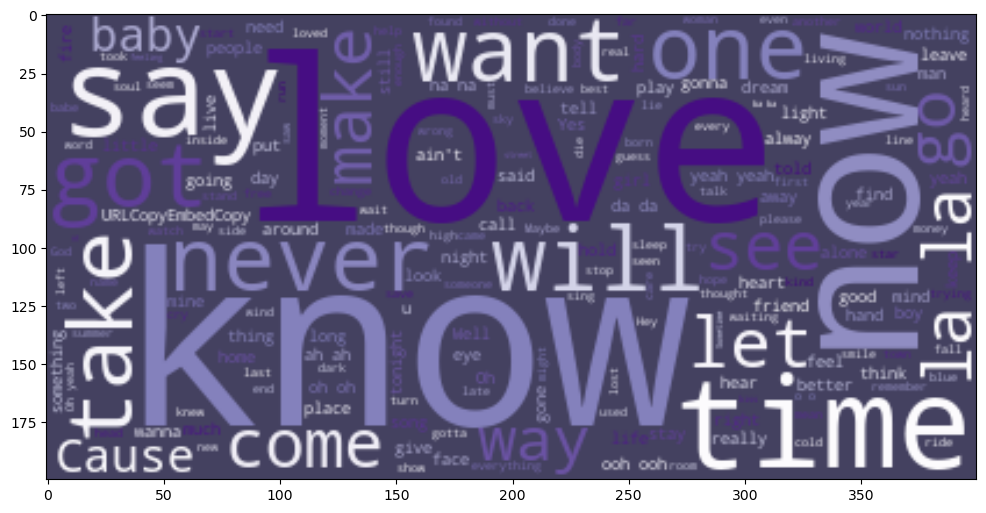

In [12]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="#444160",colormap="Purples", max_words=800).generate(" ".join(data["Lyrics"]))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

#### TOP 20 FREQUENT WORDS USED

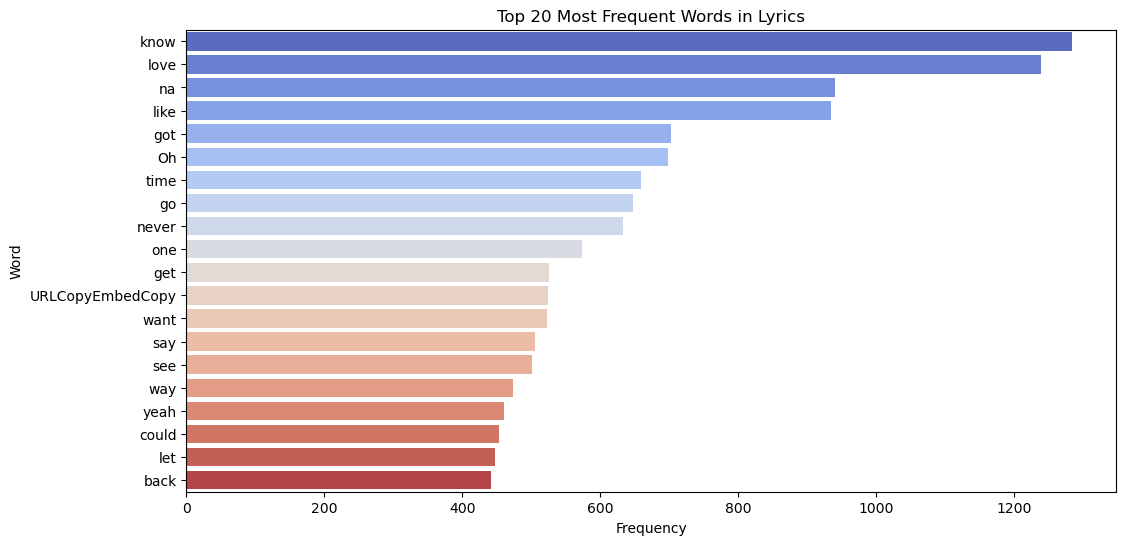

In [13]:
from collections import Counter
# Word Frequency Analysis
all_lyrics = " ".join(data['Lyrics'])
words = nltk.word_tokenize(all_lyrics)
stopwords = nltk.corpus.stopwords.words('english')
filtered_words = [word for word in words if word.isalpha() and word.lower() not in stopwords]

word_freq = Counter(filtered_words)
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df.head(20), palette='coolwarm')
plt.title('Top 20 Most Frequent Words in Lyrics')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

#### ANALYSIS OF NUMBER OF CHARACTERS, WORDS AND LINES

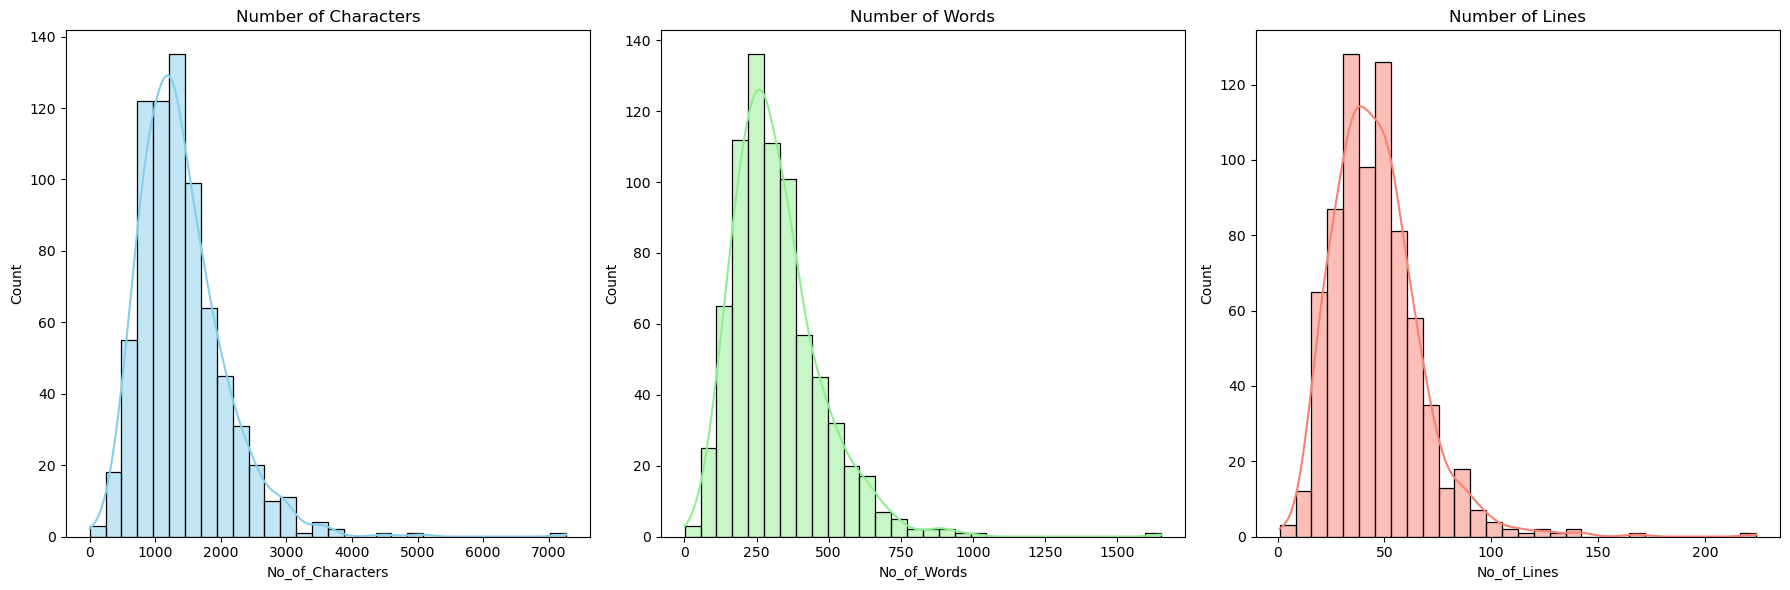

In [14]:
# Visualize the data
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(data['No_of_Characters'], bins=30, kde=True, ax=axes[0], color='skyblue').set_title('Number of Characters')
sns.histplot(data['No_of_Words'], bins=30, kde=True, ax=axes[1], color='lightgreen').set_title('Number of Words')
sns.histplot(data['No_of_Lines'], bins=30, kde=True, ax=axes[2], color='salmon').set_title('Number of Lines')
plt.tight_layout()
plt.show()

Most song lyrics in the dataset are moderately concise, with a peak distribution of approximately 1000-1500 characters, 250-500 words, and 40-70 lines, but a few songs are significantly longer, resulting in a right-skewed distribution.

#### Top 10 Artists by Number of Songs

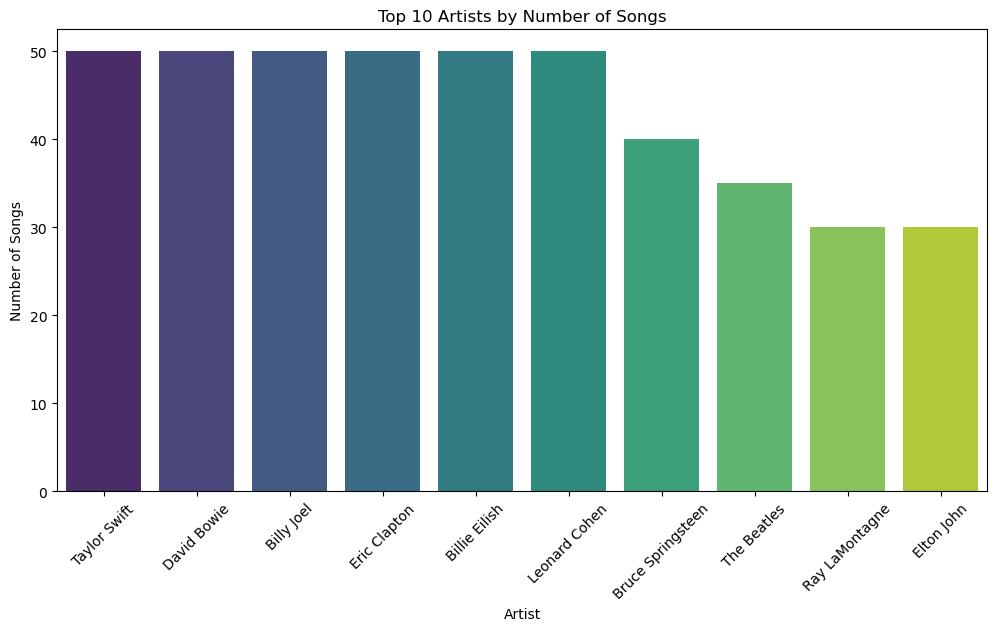

In [15]:
# Plot the top artists by number of songs
plt.figure(figsize=(12, 6))
top_artists = data['Artist'].value_counts().head(10)
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

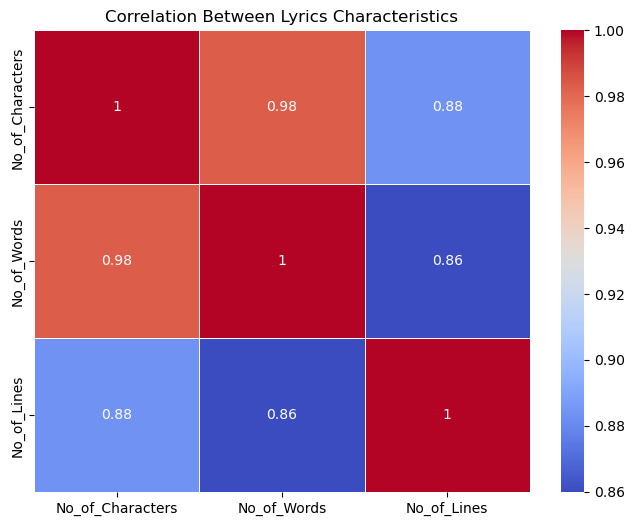

In [16]:
# Calculate the correlation matrix
correlation_matrix = data[['No_of_Characters', 'No_of_Words', 'No_of_Lines']].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Lyrics Characteristics')
plt.show()

The correlation values range from 0.86 to 1.0, indicating a strong positive correlation between these characteristics. The highest correlation of 1.0 is observed between the number of characters and the number of words, suggesting that as the number of characters increases, the number of words tends to increase proportionally. The correlations between the number of lines and the other two characteristics are slightly lower but still very high at 0.98 and 0.88, respectively.

<Figure size 1500x1500 with 0 Axes>

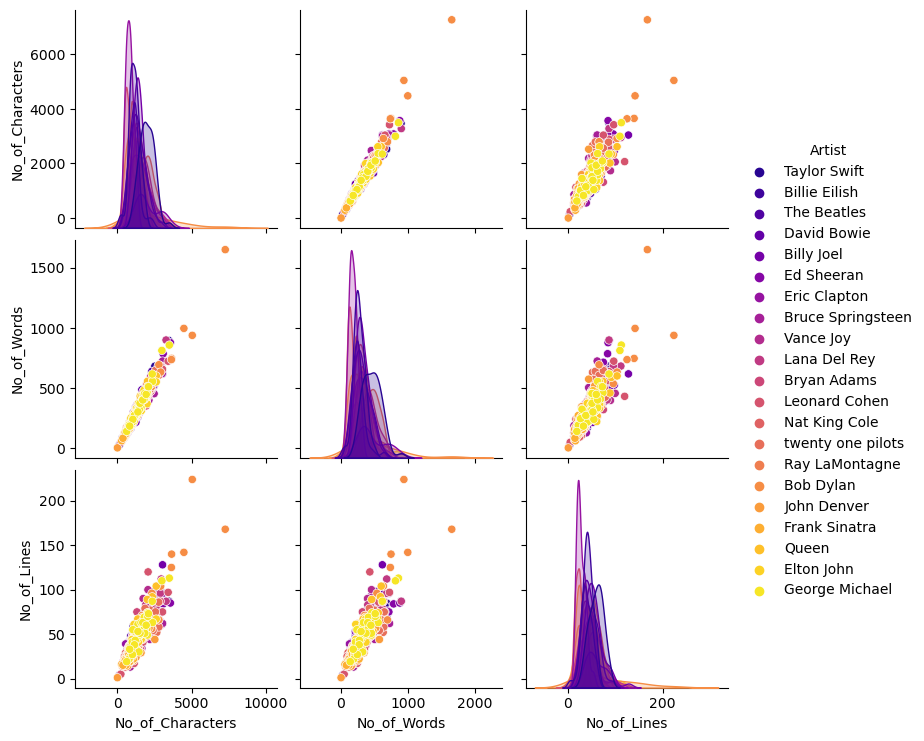

In [17]:
#Plotting the comparative song lengths for various artists
plt.figure(figsize=(15,15))
ax = sns.pairplot(data, hue="Artist", palette="plasma")


The data points are colored according to different artists or bands. The density distributions for each characteristic exhibit a right-skewed shape, indicating that most songs have relatively smaller values for these characteristics, while a few songs have exceptionally large values. The scatter plots reveal a strong positive correlation between the number of characters, words, and lines, as evidenced by the upward-sloping patterns of the data points. Some artists, like Taylor Swift, Billie Eilish, and The Beatles, appear to have a higher concentration of songs with larger values for these characteristics compared to others.

#### LYRICS ANALISIS

In [18]:
from IPython.display import HTML

# Lyrics of song number 42
song_42_lyrics = data.loc[41, 'Lyrics']

# GIF URL
gif_url = "https://media1.tenor.com/images/952a531e7265d50e5017248fe08dd6f1/tenor.gif?itemid=8183673"

# HTML code with background GIF
html_code = f"""
<div style="background-image: url('{gif_url}'); background-size: cover; padding: 20px;">
    <pre style="font-family: 'Courier New'; font-size: 14px; color: white;">
        {song_42_lyrics}
    </pre>
</div>
"""

# Display HTML in Jupyter Notebook
HTML(html_code)




### DATA PROCESSING



In [19]:
#Lining up all the lyrics to create corpus
Corpus =''
for listitem in data.Lyrics:
    Corpus += listitem
    
Corpus = Corpus.lower() #converting all alphabets to lowecase 
print("Number of unique characters:", len(set(Corpus)))

Number of unique characters: 92


In [20]:
#To See all the unique characters present in the Corpus
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\n', ' ', '!', '"', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '>', '?', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '}', '~', '©', 'à', 'á', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'ñ', 'ó', 'ö', 'ü', 'ŏ', 'е', 'ا', 'س', 'ل', 'م', 'و', '\u2005', '\u200a', '\u200b', '–', '—', '‘', '’', '‚', '“', '”', '…', '\u205f', '\ufeff']


In [21]:
#Keeping only a limited set of characters. 
to_remove = ['{', '}', '~', '©', 'à', 'á', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'ñ', 'ó', 'ö', 'ü', 'ŏ',
             'е', 'ا', 'س', 'ل', 'م', 'و', '\u2005', '\u200a', '\u200b', '–', '—', '‘', '’', '‚', '“', '”', 
             '…', '\u205f', '\ufeff', '!', '&', '(', ')', '*', '-',  '/', ]
for symbol in to_remove:
    Corpus = Corpus.replace(symbol," ")

#Corpus = re.sub("[^A-Za-z0-9'\.\n]","",Corpus) Alterneativly could be used but I want to pick and chose (:

In [22]:
#To See all the unique characters present in the Corpus
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\n', ' ', '"', "'", ',', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '>', '?', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


**Creating a list of sorted unique characters**

In [23]:
# Storing all the unique characters present in my corpus to bult a mapping dic. 
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #length of corpus
L_symb = len(symb) #length of total unique characters

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 1045494
Number of unique characters: 47


In [24]:
#Splitting the Corpus in equal length of strings and output target
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])
    
    
L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 1045454


**Encoding the Labels and Targets**

In [25]:
# reshape X and normalize
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)

# one hot encode the output variable
y = np_utils.to_categorical(targets)


# Model Building





**Building the Model**

In [26]:
#Initialising the Model
model = Sequential()
#Adding layers
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))
#Compiling the model for training  
opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

#Model's Summary               
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 47)                12079     
                                                                 
Total params: 276,271
Trainable params: 276,271
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Training the Model
history = model.fit(X, y, batch_size=128, epochs=10)

Epoch 1/10
8168/8168 [==============================] - 2430s 297ms/step - loss: 2.5743
Epoch 2/10
8168/8168 [==============================] - 3443s 422ms/step - loss: 2.2476
Epoch 3/10
8168/8168 [==============================] - 2223s 272ms/step - loss: 2.1012
Epoch 4/10
8168/8168 [==============================] - 2368s 290ms/step - loss: 2.0120
Epoch 5/10
8168/8168 [==============================] - 2204s 270ms/step - loss: 1.9354
Epoch 6/10
8168/8168 [==============================] - 2294s 281ms/step - loss: 1.8841
Epoch 7/10
8168/8168 [==============================] - 2256s 276ms/step - loss: 1.8314
Epoch 8/10
8168/8168 [==============================] - 2813s 344ms/step - loss: 1.8091
Epoch 9/10
8168/8168 [==============================] - 2331s 285ms/step - loss: 1.7719
Epoch 10/10
8168/8168 [==============================] - 2173s 266ms/step - loss: 1.7626


In [18]:
from keras.models import load_model
#To be used later; I am saving the model 
model.save("Lyrics_Generator.h5")

[Text(0.5, 0, 'Epochs')]

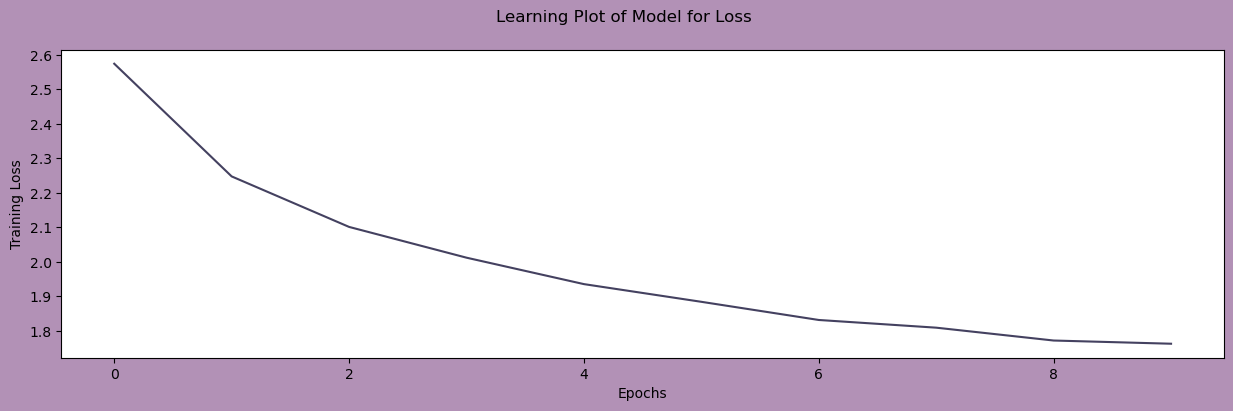

In [19]:
history_df = pd.DataFrame(history.history)
#Plotting the learnings 

fig = plt.figure(figsize=(15,4), facecolor="#B291B6")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

The learning plot shows a typical pattern of a well-behaved training process, where the model successfully learns from the data and gradually improves its performance, as evidenced by the decreasing loss over epochs.

**Generating the songs**

In [51]:
# Modify the Lyrics_Generator function
def Lyrics_Generator(starter, Ch_count):
    generated = ""
    starter = starter 
    seed = [mapping.get(char, '') for char in starter]  
    generated += starter

    # Generating new text of given length
    for i in range(Ch_count):
        seed = [mapping.get(char, '') for char in starter]  
        seed = [char for char in seed if char]  
        if not seed:
            break  
        x_pred = np.reshape(seed, (1, len(seed), 1))
        x_pred = x_pred / float(L_symb)
        prediction = model.predict(x_pred, verbose=0)[0]
        
        # Getting the index of the next most probable index
        prediction = np.asarray(prediction).astype('float64')
        prediction = np.log(prediction) / 1.0 
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        probas = np.random.multinomial(1, prediction, 1)
        index = np.argmax(prediction)
        next_char = reverse_mapping[index]

        # Generating new text
        generated += next_char
        starter = starter[1:] + next_char

    return generated


Let us finally see the outcome by putting a seed in from one of my sisters blogposts [blogpost] (https://www.poeticous.com/amanda-nechesa/let-it-be-known)

In [64]:
from IPython.display import HTML
import requests
from bs4 import BeautifulSoup

#Scrape the text content from the URL
def scrape_text_from_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all('p')  # Adjust the tag according to the HTML structure
    text_content = ' '.join([p.get_text() for p in paragraphs])
    return text_content

#  Preprocess the text 
def preprocess_text(text):
 
    return text

#  Use the Lyrics_Generator function
def generate_lyrics_from_text(text, character_count):
    # Lyrics_Generator function is already defined
    generated_lyrics = Lyrics_Generator(text, character_count)
    return generated_lyrics

# URL of the blog post
blogpost_url = "https://www.poeticous.com/amanda-nechesa/let-it-be-known"

#  Scrape text content from the URL
blogpost_text = scrape_text_from_url(blogpost_url)

#  Preprocess the text
preprocessed_text = preprocess_text(blogpost_text)

# GIF URL
gif_url = 'https://1.bp.blogspot.com/-p0Bs7YFunYQ/XbHcIeH_fGI/AAAAAAAAAR0/d2FKxrm5C9MkPFLDjAT8keJvMKzWVzuVQCLcBGAsYHQ/s1600/db699011db3cc912c9d56ccc0a91896b.gif'
# Generate lyrics using the model
generated_lyrics = generate_lyrics_from_text(preprocessed_text, character_count)

# HTML code with background GIF
html_code = f"""
<div style="background-image: url('{gif_url}'); background-size: cover; padding: 20px;">
    <pre style="font-family: 'Courier New'; font-size: 14px; color: white;">
        {generated_lyrics}
    </pre>
</div>
"""

# Display HTML in Jupyter Notebook
HTML(html_code)



In [71]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model("Lyrics_Generator.h5")

# Display the summary of the loaded model
loaded_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 47)                12079     
                                                                 
Total params: 276,271
Trainable params: 276,271
Non-trainable params: 0
_________________________________________________________________


#### CONCLUSION

The development of a song lyrics generator using Recurrent Neural Networks (RNNs) represents a significant stride in applying artificial intelligence to creative domains like music composition. This project showcases RNNs' potential to generate coherent and stylistically appropriate lyrics, providing a valuable resource for musicians and songwriters seeking inspiration or overcoming creative hurdles. While challenges in achieving high-quality lyric generation persist, this endeavor highlights the capacity of machine learning models to understand and replicate complex language patterns inherent in songwriting. As the technology advances, integrating user feedback and refining natural language processing techniques will further enhance these models, pushing the boundaries of creativity in music and beyond.

### RECOMMENDATIONS

1. Develop mechanisms for user interaction where musicians and songwriters can provide feedback on generated lyrics. Integrating user preferences and adjustments can refine the model over time, making it more responsive to creative needs and stylistic preferences.

2.  Incorporate elements of music theory, such as chord progressions, melody patterns, and song structure, into the lyrics generation process. This holistic approach can produce lyrics that not only fit stylistically but also harmonize with musical compositions.

3. Address ethical considerations related to copyright and originality when generating lyrics. Implement safeguards to ensure that generated content respects intellectual property rights and encourages ethical use in creative endeavors.

### THANK YOU